<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clusteringwith%20evolution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [26]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [27]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [28]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [29]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [30]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [31]:
data = data.loc[:10000,:]
data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pca1     10001 non-null  float64
 1   pca2     10001 non-null  float64
 2   sys_dia  10001 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


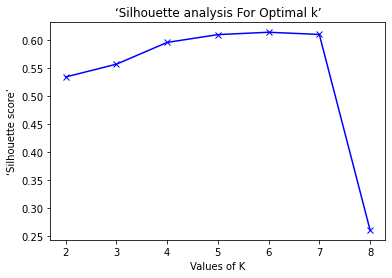

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
 
  # initialise kmeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(data)
cluster_labels = kmeans.labels_
  

In [34]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(data)
PCA_values = pca.transform(data)

In [20]:
PCA_values[cluster_labels == 0]

array([[ 5.14253456,  2.41719763],
       [ 6.2621641 ,  0.25442592],
       [ 5.74176593,  0.94385995],
       ...,
       [ 4.67979203,  4.35170991],
       [ 3.75095327,  3.37923902],
       [ 5.95020335, -1.58450505]])

In [35]:
label0 = data[cluster_labels == 0]

In [36]:
label1 = data[cluster_labels == 1]
label2 = data[cluster_labels == 2]
label3 = data[cluster_labels == 3]
label4 = data[cluster_labels == 4]
label5 = data[cluster_labels == 5]

In [37]:
label0.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


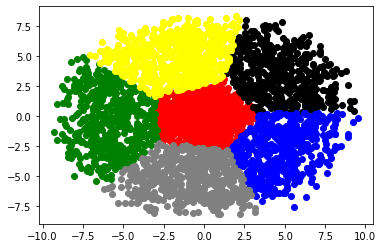

In [38]:
import matplotlib.pyplot as plt 
plt.scatter(label0["pca1"],label0["pca2"],color = "red")
plt.scatter(label1["pca1"],label1["pca2"],color = "green")
plt.scatter(label2["pca1"],label2["pca2"],color = "black")
plt.scatter(label3["pca1"],label3["pca2"],color = "blue")
plt.scatter(label4["pca1"],label4["pca2"],color = "yellow")
plt.scatter(label5["pca1"],label5["pca2"],color = "gray")
plt.show()


In [39]:
import sklearn

sklearn.metrics.davies_bouldin_score(data.values, cluster_labels)

0.7342504169436527

In [40]:
sklearn.metrics.calinski_harabasz_score(data.values, cluster_labels)

6011.755817250055